In [1]:
# Data source:
# https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
# Use this one because its already combined into a single csv

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('data/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# Column Descriptions:
# * `id `(Unique id for each patient)
# * `age` (Age of the patient in years)
# * `origin` (place of study)
# * `sex` (Male/Female)
# * `cp` chest pain type 
#   1. typical angina.
#   2. atypical angina.
#   3. non-anginal.
#   4. asymptomatic.
# * `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
# * `chol` (serum cholesterol in mg/dl)
# * `fbs` (if fasting blood sugar > 120 mg/dl)
# * `restecg` (resting electrocardiographic results)
# * `-- Values:` [normal, stt abnormality, lv hypertrophy]
# * `thalach:` maximum heart rate achieved
# * `exang:` exercise-induced angina (True/ False)
# * `oldpeak:` ST depression induced by exercise relative to rest
# * `slope:` the slope of the peak exercise ST segment
# * `ca:` number of major vessels (0-3) colored by fluoroscopy
# * `thal:`[normal; fixed defect; reversible defect]
# * `num:` the predicted attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
missing_values = df.isna().sum()
missing_report = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nMissing Values Report:")
print(missing_report)


Missing Values Report:
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
dtype: int64


In [5]:
df = df.where(pd.notnull(df), None)

Column: age

Basic Statistics:
count: 920
missing: 0
mean: 53.51
median: 54.0
std: 9.42
min: 28
max: 77
skew: -0.2
kurtosis: -0.38

Outliers: 0 found
Outlier bounds: [27.50, 79.50]


Column: trestbps

Basic Statistics:
count: 861
missing: 59
mean: 132.13
median: 130.0
std: 19.07
min: 0.0
max: 200.0
skew: 0.21
kurtosis: 2.96

Outliers: 28 found
Outlier bounds: [90.00, 170.00]


Column: chol

Basic Statistics:
count: 890
missing: 30
mean: 199.13
median: 223.0
std: 110.78
min: 0.0
max: 603.0
skew: -0.61
kurtosis: 0.06

Outliers: 183 found
Outlier bounds: [35.50, 407.50]


Column: thalch

Basic Statistics:
count: 865
missing: 55
mean: 137.55
median: 140.0
std: 25.93
min: 60.0
max: 202.0
skew: -0.21
kurtosis: -0.48

Outliers: 2 found
Outlier bounds: [64.50, 212.50]


Column: oldpeak

Basic Statistics:
count: 858
missing: 62
mean: 0.88
median: 0.5
std: 1.09
min: -2.6
max: 6.2
skew: 1.04
kurtosis: 1.13

Outliers: 16 found
Outlier bounds: [-2.25, 3.75]


Column: ca

Basic Statistics:
count: 309
missing: 611
mean: 0.68
median: 0.0
std: 0.94
min: 0.0
max: 3.0
skew: 1.17
kurtosis: 0.2

Outliers: 20 found
Outlier bounds: [-1.50, 2.50]


Column: num

Basic Statistics:
count: 920
missing: 0
mean: 1.0
median: 1.0
std: 1.14
min: 0
max: 4
skew: 0.97
kurtosis: -0.1

Outliers: 0 found
Outlier bounds: [-3.00, 5.00]


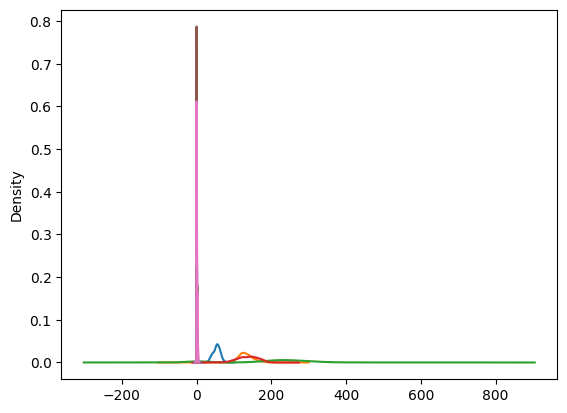

In [7]:
import numpy as np

def analyze_numeric_column(df, column_name):
    """
    Perform EDA on a numeric column using Plotly visualizations
    """
    import pandas as pd
    import numpy as np
    import plotly.graph_objects as go
    import plotly.express as px
    from plotly.subplots import make_subplots
    from scipy import stats

    # Input validation
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found")
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        raise ValueError(f"Column '{column_name}' is not numeric")

    # Calculate statistics
    stats_dict = {
        'count': df[column_name].count(),
        'missing': df[column_name].isnull().sum(),
        'mean': round(df[column_name].mean(), 2),
        'median': df[column_name].median(),
        'std': round(df[column_name].std(), 2),
        'min': df[column_name].min(),
        'max': df[column_name].max(),
        'skew': round(df[column_name].skew(), 2),
        'kurtosis': round(df[column_name].kurtosis(), 2)
    }

    # Calculate quartiles and IQR
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[column_name][(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Distribution', 'Box Plot', 'Q-Q Plot', 'Violin Plot')
    )

    # Histogram with KDE
    hist_data = go.Histogram(x=df[column_name], name='Histogram', nbinsx=30)
    kde = df[column_name].plot(kind='kde')
    fig.add_trace(hist_data, row=1, col=1)

    # Box plot
    box_data = go.Box(y=df[column_name], name='Box Plot')
    fig.add_trace(box_data, row=1, col=2)

    # Q-Q plot
    qq = stats.probplot(df[column_name].dropna(), dist='norm')
    qq_data = go.Scatter(x=qq[0][0], y=qq[0][1], mode='markers', name='Q-Q Plot')
    fig.add_trace(qq_data, row=2, col=1)

    # Violin plot
    violin_data = go.Violin(y=df[column_name], name='Violin Plot')
    fig.add_trace(violin_data, row=2, col=2)

    # Update layout
    fig.update_layout(
        title=f'EDA for {column_name}',
        showlegend=False,
        height=800
    )

    # Display results
    print("\nBasic Statistics:")
    for k, v in stats_dict.items():
        print(f"{k}: {v}")
    
    print(f"\nOutliers: {len(outliers)} found")
    print(f"Outlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

    fig.show()

    return stats_dict

for col in df.select_dtypes(include=np.number).columns:
    if col == 'id':
        continue
    print(f"Column: {col}")
    analyze_numeric_column(df, col)

In [8]:
import numpy as np

def analyze_object_column(df, column_name, target_col=None):
    """Perform EDA on categorical column with Plotly visualizations"""
    import pandas as pd
    import plotly.graph_objects as go
    import plotly.express as px
    from plotly.subplots import make_subplots
    from scipy.stats import chi2_contingency
    
    # Input validation
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found")
    if not pd.api.types.is_object_dtype(df[column_name]):
        raise ValueError(f"Column '{column_name}' is not object type")

    results = {}
    
    # Basic statistics
    value_counts = df[column_name].value_counts()
    missing_count = df[column_name].isnull().sum()
    
    results['stats'] = {
        'unique_values': df[column_name].nunique(),
        'missing_count': missing_count,
        'missing_percentage': (missing_count / len(df)) * 100,
        'mode': df[column_name].mode()[0],
        'value_counts': value_counts.to_dict()
    }
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Value Counts', 'Proportions', 'Missing Values', 'Co-occurrence'),
        specs=[[{"type": "xy"}, {"type": "domain"}], [{"type": "xy"}, {"type": "xy"}]]
    )
    
    # Bar chart
    bar = go.Bar(x=value_counts.index, y=value_counts.values)
    fig.add_trace(bar, row=1, col=1)
    
    # Pie chart
    pie = go.Pie(labels=value_counts.index, values=value_counts.values)
    fig.add_trace(pie, row=1, col=2)
    
    # Missing values visualization
    missing_data = go.Bar(
        x=['Missing', 'Present'],
        y=[missing_count, len(df) - missing_count]
    )
    fig.add_trace(missing_data, row=2, col=1)
    
    # Co-occurrence with other object columns
    other_cats = df.select_dtypes(include=['object']).columns
    other_cats = other_cats[other_cats != column_name]
    
    if len(other_cats) > 0:
        # Create co-occurrence matrix with first categorical column
        cooc = pd.crosstab(df[column_name], df[other_cats[0]])
        heatmap = go.Heatmap(
            z=cooc.values,
            x=cooc.columns,
            y=cooc.index
        )
        fig.add_trace(heatmap, row=2, col=2)
    
    # Target variable analysis
    if target_col and target_col in df.columns:
        contingency = pd.crosstab(df[column_name], df[target_col])
        chi2, p_value, _, _ = chi2_contingency(contingency)
        results['target_analysis'] = {
            'chi2_statistic': chi2,
            'p_value': p_value,
            'contingency_table': contingency.to_dict()
        }
    
    # Update layout
    fig.update_layout(
        height=800,
        title=f'EDA for {column_name}',
        showlegend=False
    )
    
    fig.show()
    return results

for col in df.select_dtypes(include=object).columns:
    print(f"Column: {col}")
    analyze_object_column(df, col, target_col='num')

Column: sex


Column: dataset


Column: cp


Column: fbs


Column: restecg


Column: exang


Column: slope


Column: thal


In [9]:
"""Create interactive correlation heatmap for all variables"""
# todo: add correlation matrix

'Create interactive correlation heatmap for all variables'

In [10]:
df['label'] = df['num'] > 0
df.drop(columns=['num'], inplace=True)

In [11]:
df.to_csv('data/model_ready.csv', index=False)